# Setup

# Plan/Outline:

1 - data loader: puts images from dataset into jupyter file

2 - normalize/standardize images

* reducing the size of each RGB value to be between -1 and 1

3 - augment images: filters

* make 4 copies of one image where we apply different filters, rotate it, etc.  --> creating bigger dataset for training of algorithm 

4 - CNN 

* try different CNN architectures, different kernels (filters), etc.


__________________

2 different libraries we can use:

* Compose in PyTorch 

* OpenCV 

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
from tqdm.notebook import tqdm

In [2]:






device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("We're using:", device)

We're using: cuda


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os

# len(list(os.scandir("drive/Shareddrives/CIS 5190 Project/train_images/")))

In [ ]:
# import cv2 as cv
# import numpy as np

# images = list(os.scandir("drive/Shareddrives/CIS 5190 Project/train_images/"))
# print(str(images[3]))

# # images = [cv.imread('/content/gdrive/MyDrive/colab/6-step-ml-framework.png') for img in images]

# # np.float32(img)

# # images = []
# path = "drive/Shareddrives/CIS 5190 Project/train_images/"

# with os.scandir(path) as itr:
#   # np.float32(img)
#   images = [np.asarray(cv.imread(path + entry.name)) for entry in itr]
#       #  print(entry.name)
#         # # Exclude the entry name
#         # # starting with '.'  
#         # if not entry.name.startswith('.') :
#         #     # print entry's name 
#         #     print(entry.name)



# # info = []
# # for files in os.scandir("drive/Shareddrives/CIS 5190 Project/train_images/"):
# #   print(files)
# #   if files.endswith(".jpg"):
# #       info.append({
# #                   "img": cv.imread(files), # add an appropriate reading flag if you want
# #                   # optional
# #                   # "foldername": os.path.dirname(root)
# #                   })
         


In [4]:
from PIL import Image

class Dataset(torch.utils.data.Dataset): 
    def __init__(self, image_ids, labels): 
      self.image_ids = image_ids
      self.labels = labels

    def __len__(self): 
      
      return len(self.image_ids)

    def __getitem__(self, i): 
      img_path = f"drive/Shareddrives/CIS 5190 Project/train_images/{self.image_ids[i]}"
      img = transforms.ToTensor()(PIL.Image.open(img_path))
      label = self.labels[i]
      return img, label

# (1) Data Loader


In [5]:
ENCODING_TO_LABELS = {0: "Cassava Bacterial Blight (CBB)", 
                      1: "Cassava Brown Streak Disease (CBSD)", 
                      2: "Cassava Green Mottle (CGM)", 
                      3: "Cassava Mosaic Disease (CMD)", 
                      4: "Healthy"}

LABELS_TO_ENCODING = {label: encoding for (encoding, label) in ENCODING_TO_LABELS.items()}


In [6]:
LABELS_TO_ENCODING

{'Cassava Bacterial Blight (CBB)': 0,
 'Cassava Brown Streak Disease (CBSD)': 1,
 'Cassava Green Mottle (CGM)': 2,
 'Cassava Mosaic Disease (CMD)': 3,
 'Healthy': 4}

In [7]:
ENCODING_TO_LABELS[0]

'Cassava Bacterial Blight (CBB)'

In [8]:
%ls

drive/  sample_data/


In [ ]:
# file = open("drive/MyDrive/train_images/1465491965.jpg")

In [ ]:
# from numpy import asarray

# class STKDataset(Dataset):
#   def __init__(self, image_path, transform=None):
#     self.image_path = image_path
#     self.labels = pd.read_csv(image_path + "labels.csv")
#     self.transform = transform

#   def __len__(self):
#     return len(self.labels)

#   def __getitem__(self, idx):
#     if torch.is_tensor(idx):
#       idx = idx.tolist()

#     img_name = os.path.join(self.image_path, self.labels.iloc[idx, 0])
#     image = Image.open(img_name)
#     img_array = asarray(image)
      
#     if self.transform:
#       image = self.transform(img_array)

#     if "label" in self.labels.columns:
#       label_name = self.labels.iloc[idx, 1]
#       label = LABELS_TO_ENCODING[label_name]
#       sample = (img_array, label)
#     else:
#       sample = (img_array)

#     return sample

In [9]:
from numpy import asarray

class STKDataset(Dataset):
  def __init__(self, image_path, transform=None):
    self.image_path = image_path
    self.labels = pd.read_csv(image_path + "train.csv")
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    img_name = os.path.join(self.image_path, self.labels.iloc[idx, 0])
    image = Image.open(img_name)
    img_array = asarray(image)
      
    if self.transform:
      image = self.transform(img_array)

    if "label" in self.labels.columns:
      label_num = self.labels.iloc[idx, 1]
      label = ENCODING_TO_LABELS[label_num]
      sample = (img_array, label)
    else:
      sample = (img_array)

    return sample

In [11]:
path = "drive/Shareddrives/CIS 5190 Project/train_images/"

dataset = STKDataset(path)

dataset[1]

(array([[[ 57,  35,  11],
         [ 75,  53,  29],
         [ 63,  43,  18],
         ...,
         [ 83, 144,  85],
         [ 88, 149,  89],
         [ 92, 153,  93]],
 
        [[ 78,  56,  32],
         [ 93,  71,  47],
         [ 91,  71,  46],
         ...,
         [101, 163, 100],
         [104, 166, 103],
         [106, 168, 105]],
 
        [[ 88,  64,  40],
         [ 86,  64,  40],
         [ 89,  67,  43],
         ...,
         [132, 194, 127],
         [136, 199, 129],
         [138, 201, 131]],
 
        ...,
 
        [[122, 118, 106],
         [139, 135, 123],
         [144, 140, 128],
         ...,
         [ 18,  66,  14],
         [ 17,  65,  15],
         [ 15,  65,  16]],
 
        [[125, 119, 105],
         [142, 136, 122],
         [151, 145, 131],
         ...,
         [ 18,  66,  14],
         [ 16,  66,  13],
         [ 15,  65,  14]],
 
        [[155, 149, 133],
         [160, 154, 138],
         [157, 151, 135],
         ...,
         [ 19,  68,  13],
  

Cassava Mosaic Disease (CMD)


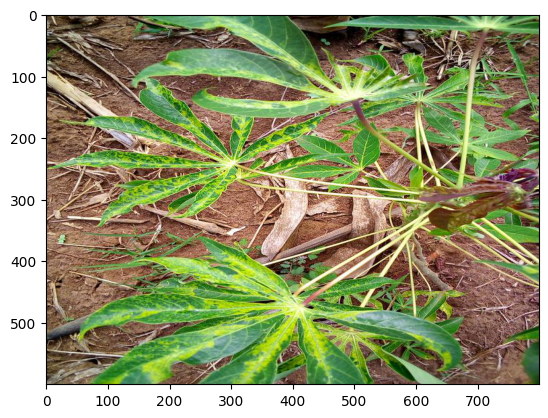

In [12]:
print(dataset[1][1])
plt.imshow(dataset[1][0])

In [13]:
print(dataset[0][0].shape)
print(dataset[1][0].shape)
print(dataset[2][0].shape)
print(dataset[3][0].shape)

(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)


These images are 600 x 800 x 3 (RGB) images

_______________
_______________
_______________

### *** If trying the new version, involving balancing of the data (towards the end), skip this and everything after this point until you reach the section balancing the data
_______________
_______________
_______________

# (2) Normalize/Standardize Images + Augmentations

Noramlize each of the images so that their values range between -1 and 1.

Also, add augmentations (if runtime & GPU permits)

- this is an optional step (if runtime & GPU limits permit)
  - code for this is already included in the class below, but may be commented out in order to do this without augmentations as a simpler start to the CNN
    - lines 59-63 & 68-72

In [14]:
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.transforms import transforms
from PIL import Image, ImageOps, ImageEnhance

In [ ]:

# class STKTransform:
#     def __init__(self):
#         self.augmentations = transforms.Compose([
#             transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
#             transforms.RandomRotation(degrees=(-10, 10)),
#             transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
#             transforms.RandomHorizontalFlip(),
#             transforms.RandomVerticalFlip(),
#             transforms.RandomGrayscale(p=0.2),
#             transforms.RandomPerspective(distortion_scale=0.3, p=0.3),
#             transforms.ToTensor(),
#             transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
#         ])

#     def __call__(self, image):
#         image = Image.fromarray(image)
#         image1 = self.augmentations(image)
#         image2 = self.augmentations(image)
#         image3 = self.augmentations(image)
#         image4 = self.augmentations(image)
#         return image1, image2, image3, image4




In [ ]:
  class STKDataset(Dataset):

    def __init__(self, image_path, transform=None):
      self.image_path = image_path
      self.labels = pd.read_csv(image_path + "train.csv")
      # self.transform = transform

      # random possible augmentations to be done on each image:
      self.augmentations = transforms.Compose([
              transforms.ToTensor(),
              # transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
              transforms.RandomRotation(degrees=(-10, 10)),
              transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
              transforms.RandomHorizontalFlip(),
              transforms.RandomVerticalFlip(),
              # transforms.RandomGrayscale(p=0.2), # repetitive
              transforms.RandomPerspective(distortion_scale=0.3, p=0.3),
              # transforms.ToTensor(),
              transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
          ])
      
      self.normalizeOnly = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])

    def __len__(self):
      return len(self.labels)

    def __getitem__(self, idx):
      if torch.is_tensor(idx):
        idx = idx.tolist()
        
      # used for standardization/normalization of pixels in images to be between -1 and 1:
      # MEAN = [0.5, 0.5, 0.5]
      # STD = [0.5, 0.5, 0.5]

      img_name = os.path.join(self.image_path, self.labels.iloc[idx, 0])
      image = Image.open(img_name).convert('RGB')
      img_array = asarray(image)

      # # normalize between 0 and 1:
      # img_array = img_array / 255.0
      # # standardize between -1 and 1:
      # img_array = (img_array - MEAN) / STD

          
      # if self.transform:
      #   img_array = self.transform(img_array)




      if "label" in self.labels.columns:
        label_num = self.labels.iloc[idx, 1]
        # label = ENCODING_TO_LABELS[label_num]
        sample_1 = (self.normalizeOnly(img_array), label_num) # tuple of original image & its label NORMALIZED

        # # create random augmentations of original to expand the dataset:
        # sample_2 = (self.augmentations(img_array), label)
        # sample_3 = (self.augmentations(img_array), label)
        # sample_4 = (self.augmentations(img_array), label)
        # sample_5 = (self.augmentations(img_array), label)

      else:
        sample_1 = self.normalizeOnly(img_array) # original image

        # # create random augmentations of original to expand the dataset:
        # sample_2 = self.augmentations(img_array)
        # sample_3 = self.augmentations(img_array)
        # sample_4 = self.augmentations(img_array)
        # sample_5 = self.augmentations(img_array)
        
      return sample_1 #, sample_2, sample_3, sample_4, sample_5
    


Use the updated class to repeat the steps above:

- apply updated transform to the dataset
- normalize/standardize the data
- split into train, validation, and test sets via dataset samplers & dataloaders 

. . . . . . .

# (3) Data Loaders into Training, Validation, and Test Sets

### Data Loading with Normalized/Standardized Pixels Between -1 and 1


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset_norm = STKDataset(path, transform=transform)


### Creating Data Loaders (Training, Validation, & Testing)


In [ ]:
num_data = len(dataset_norm)
num_train = int(num_data * 0.7)
num_validation = int(num_data * 0.2)
num_test = num_data - num_train - num_validation

In [ ]:
# Define dataset samplers
train_sampler = SubsetRandomSampler(range(num_train))
validation_sampler = SubsetRandomSampler(range(num_train, num_train + num_validation))
test_sampler = SubsetRandomSampler(range(num_train + num_validation, num_data))

In [ ]:
# Define dataloaders
train_loader = DataLoader(dataset_norm, batch_size=32, sampler = train_sampler)
validation_loader = DataLoader(dataset_norm, batch_size=32, sampler = validation_sampler)
test_loader = DataLoader(dataset_norm, batch_size=32, sampler = test_sampler)

In [ ]:
len(dataset_norm)

21397

In [ ]:
len(dataset_norm[0])

2

In [ ]:
type(dataset_norm[0][0])

torch.Tensor

In [ ]:
type(dataset_norm[0])

tuple

In [ ]:
dataset_norm[0][0]

tensor([[[-0.7490, -0.7412, -0.7176,  ...,  0.0824, -0.4196, -0.5294],
         [-0.7490, -0.7333, -0.7255,  ..., -0.6314, -0.7804, -0.6627],
         [-0.7490, -0.7412, -0.7176,  ..., -0.6863, -0.5373, -0.3255],
         ...,
         [-0.8980, -0.9059, -0.9059,  ..., -0.4510, -0.3804, -0.3412],
         [-0.8980, -0.9059, -0.8902,  ..., -0.3804, -0.4039, -0.4039],
         [-0.8824, -0.8902, -0.8902,  ..., -0.3490, -0.4824, -0.5451]],

        [[-0.3020, -0.3098, -0.2941,  ...,  0.3020, -0.2157, -0.3333],
         [-0.3098, -0.3098, -0.3020,  ..., -0.4510, -0.6078, -0.4902],
         [-0.3176, -0.3098, -0.3098,  ..., -0.5608, -0.4039, -0.1922],
         ...,
         [-0.6157, -0.6235, -0.6235,  ..., -0.3490, -0.2784, -0.2235],
         [-0.6157, -0.6235, -0.6314,  ..., -0.2784, -0.3020, -0.3020],
         [-0.6235, -0.6314, -0.6314,  ..., -0.2706, -0.4039, -0.4745]],

        [[-0.0745, -0.0745, -0.0745,  ..., -0.0196, -0.4431, -0.5059],
         [-0.0980, -0.1059, -0.0980,  ..., -0

In [ ]:
# data_tuples = []

# for lst in dataset_norm:
#   for tple in lst:
#     data_tuples.append(tple)

# data_tuples = [tple for lst in dataset_norm for tple in lst]

In [ ]:
# DECREASE BATCH SIZE IF RAM CRASHES

_______________________

Split Data into 70% Training, 20% Validation, and 10% Testing (manual split if data loaders above do not work)

- this was already done in the created data loaders above, but if they don't work, manually split the data here using torch.utils.data.random_split

# (4) Convolutional Neural Networks

____________________

- CNN Models will first be run using the class above to perform data loading & normalization/standardization of pixels, without any augmentations
  - Try a few different CNN strcutures (3-4 different ones), changing:
    - CNN architecture of the hidden layers
    - kernel/filter sizes
    - etc...
- later, after trying a few different CNN models on this data, if deemed necessary, we can try adding in data augmentation to further improve our model


__________________



# CNN Model 1: ResNet18 (1st ResNet Model)

### This will serve as a baseline model

First, crop each image to be 256 x 256 (or 224 x 224, they essentially have to be multiples of 32):

In [ ]:
from torchvision.models import resnet18
from torchvision.models import resnet34
from torchvision.models import resnet50
from torchvision.models import resnet101
from torchvision.models import resnet152

In [ ]:
transform = transforms.Compose([
    
    transforms.ToTensor(),
    transforms.CenterCrop((224, 224))
    
])

dataset_norm = STKDataset(path, transform=transform)

Now define data loaders:

In [ ]:
num_data = len(dataset_norm)
num_train = int(num_data * 0.7)
num_validation = int(num_data * 0.2)
num_test = num_data - num_train - num_validation

# Define dataset samplers
train_sampler = SubsetRandomSampler(range(num_train))
validation_sampler = SubsetRandomSampler(range(num_train, num_train + num_validation))
test_sampler = SubsetRandomSampler(range(num_train + num_validation, num_data))

# Define dataloaders
train_loader = DataLoader(dataset_norm, batch_size=64, sampler = train_sampler)
validation_loader = DataLoader(dataset_norm, batch_size=64, sampler = validation_sampler)
test_loader = DataLoader(dataset_norm, batch_size=64, sampler = test_sampler)

Then, apply ResNet CNN model:

### *** NOTE ***

### The following code is commented out since it was ran to train the model to the training set data, and was then saved to be loaded in later. This allows for further adjustments to the code to run faster (avoiding needing to retrain the model).

In [ ]:
# num_classes = 5

In [ ]:
# resnet_18 = resnet18(pretrained=True)
# for param in resnet_18.parameters():
#   param.requires_grad = False
# num_features = resnet_18.fc.in_features
# # ResNet18 Fully Connected Layer:
# resnet_18.fc = nn.Linear(num_features, num_classes)
# resnet_18.to(device)


# # create criterion & optimizer:
# optimizer = torch.optim.Adam(resnet_18.fc.parameters(), lr = 1e-2)
# criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# from tqdm.notebook import tqdm

In [ ]:
# train_loss, validation_loss = [], []
# train_acc, validation_acc = [], []

# # START:
# # Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
# num_epochs = 5 
# for epoch in range(num_epochs):
    
#     resnet_18.train()
#     running_loss = 0.
#     correct, total = 0, 0 
    
#     for i, data in tqdm(enumerate(train_loader, 0)):

#         # print(data)

#         print(inputs.dtype)
#         inputs, labels = data
#         # 1. Store the inputs and labels in the GPU
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         print('labels: ', labels.dtype)
#         print(labels)

#         # labels = transforms.Compose([
#         #     transforms.ToTensor() # np.asarray(labels)
#         # ])
#         # tf.one_hot([0, 1, 2, 3, 4], 5)
        
        
#         # 2. Get the model predictions
#         predictions = resnet_18(inputs)


#         print('pred: ', predictions.dtype)
#         print(predictions)

#         # 3. Zero the gradients out
#         optimizer.zero_grad()

#         # 4. Get the loss
#         loss = criterion(predictions, labels)

#         # 5. Calculate the gradients
#         loss.backward()
        

#         # 6. Update the weights
#         optimizer.step()
            
#         running_loss += loss.item()
        
#         _, predicted = torch.max(predictions, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
        
#     train_loss.append(running_loss / len(train_loader))
#     train_acc.append(correct/total)
            
#     resnet_18.eval()
#     running_loss = 0.
#     correct, total = 0, 0 
    
#     for i, data in tqdm(enumerate(validation_loader, 0)):

#         inputs, labels = data
#         # 1. Store the inputs and labels in the GPU
#         inputs = inputs.to(device)
#         labels = labels.to(device)
        
#         # 2. Get the model predictions
#         predictions = resnet_18(inputs)

#         # 3. Get the loss
#         loss = criterion(predictions, labels)

#         running_loss += loss.item()
        
#         _, predicted = torch.max(predictions, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
        
#     validation_loss.append(running_loss / len(validation_loader))
#     validation_acc.append(correct/total)

#     print(f"Epoch {epoch+1}:")

#     print(f"Training Loss:", round(train_loss[epoch], 3))
#     print(f"Validation Loss:", round(validation_loss[epoch], 3))
    
#     print(f"Training Accuracy:", round(train_acc[epoch], 3))
#     print(f"Validation Accuracy:", round(validation_acc[epoch], 3))

#     print("------------------------------")

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
        [-0.8057,  0.8356,  2.8506,  3.9462,  3.1372],
        [-1.5028, -0.7790,  3.5766,  4.8517,  1.4407],
        [-1.6221,  0.8578,  2.6989,  6.2096,  0.7314],
        [-1.2183,  0.1505,  1.7790,  7.4031, -0.9152],
        [ 3.9525,  4.4244,  4.6974,  1.6719,  2.7448],
        [-3.4290, -1.6414,  2.9932,  7.3845, -0.0196],
        [-3.4716, -0.7837,  4.2389,  8.4701, -2.4266],
        [-1.7132, -0.3286,  4.1981,  6.7819, -1.4401],
        [-3.0588,  0.2050,  3.1874,  5.7255,  1.5160],
        [ 5.7635,  3.6060,  2.1605,  2.7555,  3.9500],
        [ 1.4047,  2.0995,  2.4814,  2.1164,  4.9034],
        [-2.2737,  0.9063,  3.4023,  3.6157,  2.3933],
        [-0.4258,  2.1854,  3.6422,  4.2773,  0.9069],
        [-2.5114,  0.7569,  9.1659,  4.7607, -0.3251],
        [ 2.5491,  3.1208,  2.8173,  2.3577,  2.4461],
        [-1.7555,  0.1963,  4.6592,  5.4454,  1.0102],
        [-4.3449, -0.4800,  3.9064,  7.0180, -0.0393],
        [-1.28

0it [00:00, ?it/s]

Epoch 1:
Training Loss: 0.737
Validation Loss: 0.828
Training Accuracy: 0.738
Validation Accuracy: 0.726
------------------------------


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
        [ 0.7068, -0.2846,  1.3645,  5.3914,  1.5773],
        [-0.4661,  0.4840,  1.7391,  5.1226,  0.7610],
        [ 1.4112, -0.8712, -0.1386,  7.3433,  1.8248],
        [-4.3498, -2.5802,  1.4444, 10.0637, -1.5563],
        [ 4.5503, -0.7452,  1.3565,  1.4655,  6.0646],
        [ 5.4194,  2.7572,  0.2285,  3.3140,  3.8217],
        [ 1.5375, -1.1290,  0.1669,  7.1754,  1.6531],
        [ 3.3938, -1.1401,  3.3233,  4.4256,  2.0725],
        [ 2.4059, -0.6818,  3.4821,  6.3133, -0.2243],
        [ 2.4238,  1.9609,  0.6598,  5.2749,  1.9658],
        [ 2.9060,  1.5398,  0.4393,  2.3620,  5.1057],
        [ 3.1565,  0.7255,  2.3524,  3.5427,  2.2665],
        [ 7.4984,  1.4935,  0.3217,  3.4666,  3.9735],
        [-2.7793, -3.1195,  3.3796,  7.4237, -1.2135],
        [-0.7288, -1.7490,  1.5159,  8.5143, -1.6212],
        [-1.5618, -1.3582,  1.0685,  6.1436,  1.5099],
        [ 0.2944,  1.9332,  0.9620,  6.0343, -0.0284],
        [ 6.76

0it [00:00, ?it/s]

Epoch 2:
Training Loss: 0.707
Validation Loss: 0.607
Training Accuracy: 0.75
Validation Accuracy: 0.785
------------------------------


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
        [-4.4381,  1.9334, -0.2652,  8.6440, -0.5417],
        [-4.6793,  0.6388,  2.1575,  5.8608,  1.3760],
        [ 2.3688,  2.3531,  2.3556,  4.0062,  4.0398],
        [-4.4148, -1.2830,  1.8926,  8.1508, -0.4211],
        [-2.8613, -1.6584,  2.1363,  5.5232,  2.8488],
        [-2.0912, -2.2463,  5.4255,  5.7537,  0.9703],
        [ 2.7929,  1.8441,  0.9844,  3.3591,  3.9902],
        [-2.0967,  2.0234,  3.3128,  4.2730,  2.5638],
        [ 0.5691, -0.4085,  4.3060,  2.5139,  4.4404],
        [-2.4455, -0.9812,  2.3323,  6.6917,  2.2585],
        [ 0.8697, -0.4737,  0.9032,  4.9927,  5.0322],
        [-1.4263,  3.1673,  1.5304,  4.0227,  3.9861],
        [-3.2625, -1.3705,  1.2250,  7.1686,  1.8317],
        [-0.9468,  4.9390, -1.0305,  5.1846,  2.1649],
        [-0.5355,  0.8448, -0.1630,  6.4174,  1.4142],
        [ 4.4656,  5.5005,  0.5480,  2.1580,  4.5141],
        [-2.3103,  1.4227, -1.7184, 10.8110, -3.1529],
        [-3.98

0it [00:00, ?it/s]

Epoch 3:
Training Loss: 0.663
Validation Loss: 0.608
Training Accuracy: 0.767
Validation Accuracy: 0.793
------------------------------


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
        [-5.4044e-01,  1.0354e+00,  1.3015e+00,  5.5910e+00,  2.2520e+00],
        [-3.7654e-01,  5.7148e+00,  1.9519e+00,  2.3339e+00,  2.3135e+00],
        [ 2.0330e+00,  3.4804e+00,  1.8801e+00,  4.1054e+00,  1.8274e+00],
        [ 1.1076e+00,  2.9869e+00,  2.3075e+00,  2.7678e+00,  5.9432e+00],
        [-8.3626e+00, -1.2145e+00,  2.2896e+00,  1.1309e+01, -3.9612e+00],
        [-1.9587e-01,  1.1272e+00,  2.4080e+00,  4.3214e+00,  3.5897e+00],
        [-3.5983e+00,  2.2692e+00,  6.4447e-01,  7.9528e+00, -2.7928e+00],
        [-4.4599e-01, -2.4618e-01,  3.8292e+00,  3.4985e+00,  3.7073e+00],
        [-2.3025e-01,  3.6509e+00,  1.3552e+00,  3.1831e+00,  5.0427e+00],
        [-1.9726e+00,  4.5671e-01,  9.0038e+00,  3.0493e+00,  1.0057e+00],
        [-4.6588e+00,  3.4602e-01,  3.0447e+00,  7.9105e+00, -7.0708e-01],
        [-1.3095e+00,  4.0325e+00,  4.0487e+00,  3.9500e+00,  8.7917e-01],
        [-1.5486e+00,  1.8166e+00,  1.5898e+00,  

0it [00:00, ?it/s]

Epoch 4:
Training Loss: 0.68
Validation Loss: 0.956
Training Accuracy: 0.764
Validation Accuracy: 0.735
------------------------------


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
        [-2.5243e-01, -4.8792e+00,  3.5751e+00,  7.5400e+00, -1.0309e-02],
        [ 5.4293e-01, -8.8204e-02,  1.5060e+00,  6.8264e+00,  7.1945e-01],
        [ 7.8302e-01, -1.0249e-01,  3.2874e-02,  7.3127e+00,  1.2626e+00],
        [-2.7011e+00,  1.0287e-01,  1.2084e+00,  6.2716e+00,  1.2595e+00],
        [ 1.4482e+00,  8.9096e-01, -2.2863e-01,  5.9608e+00,  5.7259e-01],
        [ 2.5289e+00,  8.3730e-01,  6.7210e+00,  2.0532e+00,  2.5115e+00],
        [ 1.1827e+00, -2.3956e+00,  8.0750e+00,  3.8603e+00,  1.2749e+00],
        [ 4.2810e+00,  7.6104e-01,  3.3231e+00,  2.2331e+00,  3.9527e+00],
        [-5.6800e-01, -2.3943e+00,  3.2538e+00,  6.5743e+00,  1.2242e+00],
        [ 1.9730e+00,  2.3798e+00,  1.9983e+00,  5.8260e+00, -6.5753e-01],
        [ 1.3038e+00,  2.8545e+00,  2.9254e+00,  2.6658e+00,  2.9108e+00],
        [-2.7776e+00,  7.3568e-01,  4.5071e+00,  4.9921e+00,  1.2026e+00],
        [ 4.9089e+00,  1.4048e-02,  2.1864e+00,  

0it [00:00, ?it/s]

Epoch 5:
Training Loss: 0.662
Validation Loss: 0.644
Training Accuracy: 0.771
Validation Accuracy: 0.769
------------------------------


### SAVING THE TRAINED ResNet18 MODEL:

In [ ]:
# # saving trained resnet_18 model:
# torch.save(resnet_18.state_dict(), '/content/drive/Shareddrives/CIS 5190 Project/resnet_18.pt')



<All keys matched successfully>

### LOADING IN THE SAVED ResNet18 MODEL:

In [ ]:
# loading the saved trained resnet_18 model:
  # the saved resnet_18 model will now be saved as the 
  # variable 'model_18' once loaded in.
model_18 = resnet18(pretrained=True)
num_classes = 5
model_18.fc = nn.Linear(model_18.fc.in_features, num_classes)
# model_18 = model_18.to(device)

model_18.load_state_dict(torch.load('/content/drive/Shareddrives/CIS 5190 Project/resnet_18.pt', map_location = 'cpu'))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 146MB/s]


<All keys matched successfully>

### Use ResNet18 Trained Model on Test Set:

Below, we are going to make the batch size for the test loader smaller in order to avoid the GPU RAM crashing.



In [ ]:
test_loader = DataLoader(dataset_norm, batch_size=32, sampler = test_sampler)

Load trained ResNet model and use it on test set:

In [ ]:
model_18 = model_18.to(device)

In [ ]:
# model_18.state_dict()

In [ ]:
# create criterion:
criterion = nn.CrossEntropyLoss()

In [ ]:
test_loss = []
test_acc = []


model_18.eval()
running_loss = 0.
correct, total = 0, 0 

# START:
# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
    
for i, data in tqdm(enumerate(test_loader, 0)):

    inputs, labels = data
    # 1. Store the inputs and labels in the GPU
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # 2. Get the model predictions
    predictions = model_18(inputs)

    # 3. Get the loss
    loss = criterion(predictions, labels)

    running_loss += loss.item()
    
    _, predicted = torch.max(predictions, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
test_loss.append(running_loss / len(test_loader))
test_acc.append(correct/total)

print(f"Test Loss:", round(test_loss[-1], 3))

print(f"Test Accuracy:", round(test_acc[-1], 3))

print("------------------------------")

0it [00:00, ?it/s]

Test Loss: 0.671
Test Accuracy: 0.763
------------------------------


. . . . . . . . . . . . . . . . . . . . . . . . . .

### Next, we noticed the data was a bit skewed, with one class haveing more samples than others.

### Try to fix this by unskewing the data! 

### Repeat the training of a ResNet18 model after unskewing the data

In [ ]:
# INSERT CODE FOR BALANCING THE DATA AND RETRAINING RESNET18 HERE:

______________

# CNN Model 2: Personally Designed CNN

Try a few different CNN strcutures (3-4 different ones), changing:

- CNN architecture of the hidden layers
- kernel/filter sizes
- etc...

### Before training this model, edit images & reize all images from 600 x 800 to 60 x 80

--> This is done by adding a transform.ReSize((60, 80)) line to the self.normalizeOnly variable

In [ ]:
  class STKDataset(Dataset):

    def __init__(self, image_path, transform=None):
      self.image_path = image_path
      self.labels = pd.read_csv(image_path + "train.csv")
      self.transform_train = transform

      # random possible augmentations to be done on each image:
      self.augmentations = transforms.Compose([
              transforms.ToTensor(),
              # transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
              transforms.RandomRotation(degrees=(-10, 10)),
              transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
              transforms.RandomHorizontalFlip(),
              transforms.RandomVerticalFlip(),
              # transforms.RandomGrayscale(p=0.2), # repetitive
              transforms.RandomPerspective(distortion_scale=0.3, p=0.3),
              # transforms.ToTensor(),
              transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
          ])
      
      self.normalizeOnly = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        # add resizeing of images to 60x80:
        transforms.Resize((60,80))
      ])

    def __len__(self):
      return len(self.labels)

    def __getitem__(self, idx):
      if torch.is_tensor(idx):
        idx = idx.tolist()
        
      # used for standardization/normalization of pixels in images to be between -1 and 1:
      # MEAN = [0.5, 0.5, 0.5]
      # STD = [0.5, 0.5, 0.5]

      img_name = os.path.join(self.image_path, self.labels.iloc[idx, 0])
      image = Image.open(img_name).convert('RGB')
      img_array = asarray(image)

      # # normalize between 0 and 1:
      # img_array = img_array / 255.0
      # # standardize between -1 and 1:
      # img_array = (img_array - MEAN) / STD

          
      if self.transform_train is not None:
        img_array = self.transform_train(img_array)
        img_array = asarray(image)




      if "label" in self.labels.columns:
        label_num = self.labels.iloc[idx, 1]
        # label = ENCODING_TO_LABELS[label_num]
        sample_1 = (self.normalizeOnly(img_array), label_num) # tuple of original image & its label NORMALIZED

        # # create random augmentations of original to expand the dataset:
        # sample_2 = (self.augmentations(img_array), label)
        # sample_3 = (self.augmentations(img_array), label)
        # sample_4 = (self.augmentations(img_array), label)
        # sample_5 = (self.augmentations(img_array), label)

      else:
        sample_1 = self.normalizeOnly(img_array) # original image

        # # create random augmentations of original to expand the dataset:
        # sample_2 = self.augmentations(img_array)
        # sample_3 = self.augmentations(img_array)
        # sample_4 = self.augmentations(img_array)
        # sample_5 = self.augmentations(img_array)
        
      return sample_1 #, sample_2, sample_3, sample_4, sample_5

In [ ]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize((60, 80)) --> this is added into the STKDataset class already
    
])

dataset_norm = STKDataset(path, transform=transform_train)


Also, before training the model, redefine the data loaders with smaller batch sizes in order for the GPU not to crash

In [ ]:
num_data = len(dataset_norm)
num_train = int(num_data * 0.7)
num_validation = int(num_data * 0.2)
num_test = num_data - num_train - num_validation

# Define dataset samplers
train_sampler = SubsetRandomSampler(range(num_train))
validation_sampler = SubsetRandomSampler(range(num_train, num_train + num_validation))
test_sampler = SubsetRandomSampler(range(num_train + num_validation, num_data))

# Define dataloaders
train_loader = DataLoader(dataset_norm, batch_size=32, sampler = train_sampler)
validation_loader = DataLoader(dataset_norm, batch_size=32, sampler = validation_sampler)
test_loader = DataLoader(dataset_norm, batch_size=32, sampler = test_sampler)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # START: Create the layers of your CNN here

        num_classes = 5
        
        # 1st convolutional layer:
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=(4,4), stride=(1,1))
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # 2nd convolutional layer:
        self.conv2 = nn.Conv2d(in_channels=9, out_channels=6, kernel_size=(4,4), stride=(1,1))
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # 3rd convolutional layer:
        self.conv3 = nn.Conv2d(in_channels=6, out_channels=3, kernel_size=(4,4), stride=(1,1))
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        # 1st FC layer (fully connected) --> ReLU layers:
        self.fc1 = nn.Linear(in_features = 84, out_features = 21) # in_features of 1st fully connected layer = size of output from last maxPool layer
        self.relu4 = nn.ReLU()

        # 2nd fully connected layer (FC):s
        self.fc2 = nn.Linear(in_features = 21, out_features = num_classes)

        # softmax classifier:
        self.logSoftmax = nn.LogSoftmax(dim=1)

        # STUDENT TODO END

    def forward(self, x):
        # STUDENT TODO START: Perform the forward pass through the layers
        
        # pass input thru 1st conv layer:
        x = self.conv1(x)
        # print('Shape after conv1: ', x.shape)
        x = self.relu1(x)
        x = self.maxpool1(x)
        # print('Shape after maxPool1: ', x.shape)

        # pass input thru 2nd conv layer:
        x = self.conv2(x)
        # print('Shape after conv2: ', x.shape)
        x = self.relu2(x)
        x = self.maxpool2(x)
        # print('Shape after maxPool2: ', x.shape)

        # pass input thru 3rd conv layer:
        x = self.conv3(x)
        # print('Shape after conv3: ', x.shape)
        x = self.relu3(x)
        x = self.maxpool3(x)
        # print('Shape after maxPool3: ', x.shape)

        # flatten output & pass it thru 1st fully connected layer (FC):
        flat = nn.Flatten() #x,1
        x = flat(x)
        x = self.fc1(x)
        x = self.relu4(x)

        # 2nd fully connected layer: 
        x = self.fc2(x)
        # output into softmax classifiersss
        output = self.logSoftmax(x)

        return output


# CREATE MODEL:
model = Net()


Create the criterion & optimizer:

In [ ]:
# 1. Set the criterion to be cross entropy loss
criterion = nn.CrossEntropyLoss()

# 2. Experiment with different optimizers
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
train_loss, validation_loss = [], []
train_acc, validation_acc = [], []

# START:
# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
num_epochs = 5
for epoch in range(num_epochs):
    
    model.train()
    running_loss = 0.
    correct, total = 0, 0 
    
    for i, data in tqdm(enumerate(train_loader, 0)):

        # print(data)


        inputs, labels = data
        # 1. Store the inputs and labels in the GPU
        inputs = inputs
        labels = labels

        # print('labels: ', type(labels))
        # print(labels)

        # labels = transforms.Compose([
        #     transforms.ToTensor() # np.asarray(labels)
        # ])
        # tf.one_hot([0, 1, 2, 3, 4], 5)
        
        
        # 2. Get the model predictions
        predictions = model(inputs)


        # print('pred: ', type(predictions))
        # print(predictions)

        # 3. Zero the gradients out
        optimizer.zero_grad()

        # 4. Get the loss
        loss = criterion(predictions, labels)

        # 5. Calculate the gradients
        loss.backward()
        

        # 6. Update the weights
        optimizer.step()
            
        running_loss += loss.item()
        
        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    train_loss.append(running_loss / len(train_loader))
    train_acc.append(correct/total)
            
    model.eval()
    running_loss = 0.
    correct, total = 0, 0 
    
    for i, data in tqdm(enumerate(validation_loader, 0)):

        inputs, labels = data
        # 1. Store the inputs and labels in the GPU
        inputs = inputs
        labels = labels
        
        # 2. Get the model predictions
        predictions = model(inputs)

        # 3. Get the loss
        loss = criterion(predictions, labels)

        running_loss += loss.item()
        
        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    validation_loss.append(running_loss / len(validation_loader))
    validation_acc.append(correct/total)

    print(f"Epoch {epoch+1}:")

    print(f"Training Loss:", round(train_loss[epoch], 3))
    print(f"Validation Loss:", round(validation_loss[epoch], 3))
    
    print(f"Training Accuracy:", round(train_acc[epoch], 3))
    print(f"Validation Accuracy:", round(validation_acc[epoch], 3))

    print("------------------------------")

    torch.save(model.state_dict(), '/content/drive/Shareddrives/CIS 5190 Project/model_{}.pt'.format(epoch))




0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
       grad_fn=<LogSoftmaxBackward0>)
labels:  <class 'torch.Tensor'>
tensor([1, 3, 3, 3, 3, 3, 4, 4, 4, 1, 3, 0, 4, 2, 3, 1, 3, 3, 3, 3, 4, 4, 0, 2,
        1, 1, 3, 2, 3, 3, 3, 3])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
pred:  <class 'torch.Tensor'>
tensor([[-2.8709, -2.5987, -2.2020, -0.4461, -2.1348],
        [-2.5638, -2.3287, -2.0421, -0.5821, -1.9871],
        [-3.3583, -3.0274, -2.4816, -0.2925, -2.4444],
        [-2.6431, -2.4562, -2.1238, -0.5223, -2.0372],
        [-3.2185, -2.8833, -2.4049, -0.3329, -2.3340],
        [-2.7440, -2.4983, -2.0948, -0.5005, -2.0863],
        [-2.0631, -1.8494, -1.7348, -1.0252, -1.7122],
        [-2.1704, -1.9234, -1.7616, -0.9308, -1.7501],
  

0it [00:00, ?it/s]

Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2: 

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
       grad_fn=<LogSoftmaxBackward0>)
labels:  <class 'torch.Tensor'>
tensor([3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        0, 3, 3, 3, 3, 1, 3, 1])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
pred:  <class 'torch.Tensor'>
tensor([[-7.4638, -5.3488, -3.1481, -0.0713, -3.8842],
        [-7.7867, -5.7224, -3.4866, -0.0506, -4.1991],
        [-4.9958, -3.6372, -2.5974, -0.1896, -2.7307],
        [-6.0458, -4.2737, -2.6520, -0.1387, -3.1527],
        [-4.9036, -3.6385, -2.3226, -0.2216, -2.7031],
        [-4.4668, -3.3130, -2.3761, -0.2510, -2.5110],
        [-5.8112, -4.1434, -2.5626, -0.1509, -3.1204],
        [-2.5215, -1.6808, -1.9702, -0.9147, -1.6432],
  

0it [00:00, ?it/s]

Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2: 

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
       grad_fn=<LogSoftmaxBackward0>)
labels:  <class 'torch.Tensor'>
tensor([3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 4, 3, 3, 4, 2, 3, 3, 0, 3, 4, 4, 3, 3,
        3, 3, 3, 3, 1, 3, 4, 3])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
pred:  <class 'torch.Tensor'>
tensor([[-4.2038, -3.1371, -2.0423, -0.3179, -2.4739],
        [-5.7061, -4.2294, -2.6987, -0.1284, -3.3444],
        [-6.3861, -4.8284, -2.8326, -0.0999, -3.6281],
        [-3.4145, -2.5197, -1.9232, -0.4712, -2.1522],
        [-5.4541, -4.0741, -2.6455, -0.1492, -3.0713],
        [-5.4754, -4.0755, -2.4533, -0.1639, -3.1232],
        [-6.3428, -4.6286, -2.7596, -0.1111, -3.4958],
        [-5.3576, -3.9533, -2.3851, -0.1778, -3.0590],
  

0it [00:00, ?it/s]

Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2: 

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
       grad_fn=<LogSoftmaxBackward0>)
labels:  <class 'torch.Tensor'>
tensor([3, 3, 4, 3, 3, 0, 3, 4, 0, 4, 2, 1, 3, 4, 3, 3, 4, 3, 3, 2, 1, 3, 2, 3,
        3, 2, 3, 1, 3, 4, 2, 2])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
pred:  <class 'torch.Tensor'>
tensor([[-4.0298, -2.9941, -2.1424, -0.3172, -2.4463],
        [-4.6058, -3.4666, -2.1339, -0.2587, -2.6834],
        [-1.5485, -1.0925, -2.3300, -2.1212, -1.4487],
        [-5.6227, -3.9925, -2.7309, -0.1377, -3.1836],
        [-6.6607, -5.0547, -2.9573, -0.0839, -3.8717],
        [-1.5927, -1.3932, -2.2269, -1.6547, -1.3889],
        [-6.5046, -4.9883, -2.8993, -0.0888, -3.8342],
        [-1.6872, -1.3731, -2.1930, -1.5320, -1.4527],
  

0it [00:00, ?it/s]

Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2: 

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
       grad_fn=<LogSoftmaxBackward0>)
labels:  <class 'torch.Tensor'>
tensor([1, 2, 2, 3, 1, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 0, 2, 3, 3, 0, 2, 4, 2, 3,
        3, 1, 3, 1, 3, 3, 3, 3])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
pred:  <class 'torch.Tensor'>
tensor([[-1.3999, -1.0465, -2.7152, -2.4838, -1.3760],
        [-5.0467, -3.8988, -2.2723, -0.2088, -2.8362],
        [-4.2463, -3.3023, -2.0562, -0.3143, -2.4007],
        [-6.0965, -4.9736, -2.7115, -0.1081, -3.6189],
        [-1.0775, -1.0501, -3.6255, -2.8801, -1.4833],
        [-4.7775, -4.1068, -2.3194, -0.1961, -2.9029],
        [-1.8177, -1.4302, -2.2505, -1.4220, -1.3792],
        [-5.5418, -4.5163, -2.4405, -0.1518, -3.2482],
  

0it [00:00, ?it/s]

Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2:  torch.Size([32, 6, 25, 35])
Shape after maxPool2:  torch.Size([32, 6, 12, 17])
Shape after conv3:  torch.Size([32, 3, 9, 14])
Shape after maxPool3:  torch.Size([32, 3, 4, 7])
Shape after conv1:  torch.Size([32, 9, 57, 77])
Shape after maxPool1:  torch.Size([32, 9, 28, 38])
Shape after conv2: 

### SAVING THE TRAINED Custom CNN MODEL:

In [ ]:
# # saving trained custom model model:
# torch.save(model.state_dict(), '/content/drive/Shareddrives/CIS 5190 Project/model.pt')



### LOADING IN THE SAVED Custom CNN MODEL:

In [ ]:
# # loading the saved trained resnet_18 model:
#   # the saved resnet_18 model will now be saved as the 
#   # variable 'model_18' once loaded in.
# model = Net(pretrained=True)
# num_classes = 5
# model.fc = nn.Linear(model.fc.in_features, num_classes)
# # model_18 = model_18.to(device)

# model.load_state_dict(torch.load('/content/drive/Shareddrives/CIS 5190 Project/model.pt', map_location = 'cpu'))

### Use Custom CNN Trained Model on Test Set:

Below, we are going to make the batch size for the test loader smaller in order to avoid the GPU RAM crashing.



In [ ]:
test_loader = DataLoader(dataset_norm, batch_size=16, sampler = test_sampler)

Load trained ResNet model and use it on test set:

In [ ]:
model = model.to(device)

In [ ]:
# create criterion:
criterion = nn.CrossEntropyLoss()

In [ ]:
test_loss = []
test_acc = []


model.eval()
running_loss = 0.
correct, total = 0, 0 

# START:
# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
    
for i, data in tqdm(enumerate(test_loader, 0)):

    inputs, labels = data
    # 1. Store the inputs and labels in the GPU
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # 2. Get the model predictions
    predictions = model(inputs)

    # 3. Get the loss
    loss = criterion(predictions, labels)

    running_loss += loss.item()
    
    _, predicted = torch.max(predictions, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
test_loss.append(running_loss / len(test_loader))
test_acc.append(correct/total)

print(f"Test Loss:", round(test_loss[-1], 3))

print(f"Test Accuracy:", round(test_acc[-1], 3))

print("------------------------------")

0it [00:00, ?it/s]

Test Loss: 1.539
Test Accuracy: 0.608
------------------------------


In [ ]:
# INSERT CODE FOR BALANCING THE DATA AND RETRAINING RESNET18 HERE:

______________________
______________________
______________________


# TRY REPEATING THE RESNET18 MODEL WITH BALANCING THE DATA TO FIX HOW IT WAS SKEWED 

### Apply this code to my models from above:
- retrain the models with the now balanced data 
- analyze training & validation performance 
- analyze test performance

In [16]:
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.transforms import transforms
from PIL import Image, ImageOps, ImageEnhance

_____________

# ResNet18:

# Augmentations:
The augmentations used to oversample the entire dataset

In [17]:
transform = transforms.Compose([
    transforms.RandomCrop(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Data Loading

In [18]:
ENCODING_TO_LABELS = {0: "Cassava Bacterial Blight (CBB)", 
                      1: "Cassava Brown Streak Disease (CBSD)", 
                      2: "Cassava Green Mottle (CGM)", 
                      3: "Cassava Mosaic Disease (CMD)", 
                      4: "Healthy"}

LABELS_TO_ENCODING = {label: encoding for (encoding, label) in ENCODING_TO_LABELS.items()}

In [19]:
class LeafDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        label = int(label)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Balancing the data
Oversampling the minority classes using transformations

In [23]:
path_csv = "drive/Shareddrives/CIS 5190 Project/train_images/train.csv"
path_img = "drive/Shareddrives/CIS 5190 Project/train_images"


In [27]:
from collections import Counter
from torchvision.io import read_image



In [28]:
dataset = LeafDataset(annotations_file=path_csv, img_dir=path_img, transform=transform)

# Count the number of samples in each class
labels = [label for _, label in tqdm(dataset)]
label_counts = Counter(labels)

  0%|          | 0/21397 [00:00<?, ?it/s]

In [29]:
# Find the minority classes
minority_classes = [label for label, count in label_counts.items() if count < max(label_counts.values())]
# Calculate the number of samples to add for each minority class
num_samples_to_add = {minority_class: max(label_counts.values()) - label_counts[minority_class] for minority_class in minority_classes}

In [31]:
from torchvision.utils import save_image


In [34]:
# Augment the images of the minority classes
n_images = 0
augmented_labels = []
for label in minority_classes:
    print("Augmenting label", label, "/", len(minority_classes), "...")

    # Get the indices of the samples in the minority class
    minority_indices = [i for i, l in enumerate(labels) if l == label]
    # Create a dataloader for the minority class
    minority_dataloader = DataLoader(dataset, batch_size=1, sampler=SubsetRandomSampler(minority_indices))
    # Augment the images of the minority class
    num_to_add = num_samples_to_add[label]
    n = 0
    finished = False

    while True:
      if finished:
        break

      for image, label1 in minority_dataloader:
          if n >= num_to_add:
              finished = True
              break
          
          # Immediately save the image to the runtime storage
          image_path = f"drive/Shareddrives/CIS 5190 Project/train_images/augmented_{n_images}.jpg"
          save_image(transform(image.squeeze()), image_path)
          # augmented_images.append(transform(image.squeeze()))
          augmented_labels.append(int(label1.item()))
          n += 1
          n_images += 1

Augmenting label 0 / 4 ...
Augmenting label 1 / 4 ...
Augmenting label 2 / 4 ...
Augmenting label 4 / 4 ...


In [35]:
# Add the augmented images' labels to the dataset
new_labels_pd = pd.DataFrame({'image_id': [f"augmented_{i}.jpg" for i in range(len(augmented_labels))],
                                             'label': augmented_labels})
dataset.img_labels = pd.concat([dataset.img_labels, new_labels_pd])

In [36]:
# Verify that the dataset is now balanced
"""labels = [label for _, label in tqdm(dataset)]
label_counts = Counter(labels)
print(label_counts)"""

'labels = [label for _, label in tqdm(dataset)]\nlabel_counts = Counter(labels)\nprint(label_counts)'

# Train/Test Split

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


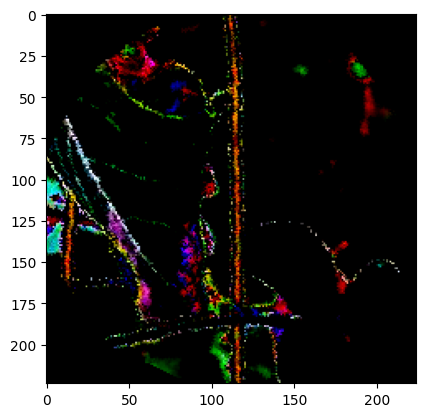

Label: Cassava Bacterial Blight (CBB)


In [37]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
                             
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
img = np.dstack(img[:])
plt.imshow(img)

plt.show()
print(f"Label: {ENCODING_TO_LABELS[label.item()]}")

# Define Convolution net model:
We should implement 3 different models based on popular architectures available on the net and train them. Then test each one and see which one performs the best. Then optimize that one.

# CNN Model 1: ResNet18 (1st ResNet Model)

### This will serve as a baseline model

First, crop each image to be 256 x 256 (or 224 x 224, they essentially have to be multiples of 32):

In [38]:
from torchvision.models import resnet18
from torchvision.models import resnet34
from torchvision.models import resnet50
from torchvision.models import resnet101
from torchvision.models import resnet152

In [39]:
# transform = transforms.Compose([
    
#     transforms.ToTensor(),
#     transforms.CenterCrop((224, 224))
    
# ])

# dataset_norm = STKDataset(path, transform=transform)

Now define data loaders:

In [41]:
num_data = len(dataset_norm)
num_train = int(num_data * 0.7)
num_validation = int(num_data * 0.2)
num_test = num_data - num_train - num_validation

# Define dataset samplers
train_sampler = SubsetRandomSampler(range(num_train))
validation_sampler = SubsetRandomSampler(range(num_train, num_train + num_validation))
test_sampler = SubsetRandomSampler(range(num_train + num_validation, num_data))

# Define dataloaders
train_loader = DataLoader(dataset, batch_size=64, sampler = train_sampler)
validation_loader = DataLoader(dataset, batch_size=64, sampler = validation_sampler)
test_loader = DataLoader(dataset, batch_size=64, sampler = test_sampler)

Then, apply ResNet CNN model:

### *** NOTE ***

### The following code is commented out since it was ran to train the model to the training set data, and was then saved to be loaded. This allows for further adjustments to the code to run faster (avoiding needing to retrain the model).

In [42]:
num_classes = 5

In [43]:
resnet_18 = resnet18(pretrained=True)
for param in resnet_18.parameters():
  param.requires_grad = False
num_features = resnet_18.fc.in_features
# ResNet18 Fully Connected Layer:
resnet_18.fc = nn.Linear(num_features, num_classes)
resnet_18.to(device)


# create criterion & optimizer:
optimizer = torch.optim.Adam(resnet_18.fc.parameters(), lr = 1e-2)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.0MB/s]


In [44]:
from tqdm.notebook import tqdm

In [46]:
train_loss, validation_loss = [], []
train_acc, validation_acc = [], []

# START:
# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
num_epochs = 5 
for epoch in range(num_epochs):
    
    resnet_18.train()
    running_loss = 0.
    correct, total = 0, 0 
    
    for i, data in tqdm(enumerate(train_loader, 0)):

        # print(data)

        inputs, labels = data
        # print(inputs.dtype)

        # 1. Store the inputs and labels in the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # print('labels: ', labels.dtype)
        # print(labels)

        # labels = transforms.Compose([
        #     transforms.ToTensor() # np.asarray(labels)
        # ])
        # tf.one_hot([0, 1, 2, 3, 4], 5)
        
        
        # 2. Get the model predictions
        predictions = resnet_18(inputs)


        # print('pred: ', predictions.dtype)
        # print(predictions)

        # 3. Zero the gradients out
        optimizer.zero_grad()

        # 4. Get the loss
        loss = criterion(predictions, labels)

        # 5. Calculate the gradients
        loss.backward()
        

        # 6. Update the weights
        optimizer.step()
            
        running_loss += loss.item()
        
        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    train_loss.append(running_loss / len(train_loader))
    train_acc.append(correct/total)
            
    resnet_18.eval()
    running_loss = 0.
    correct, total = 0, 0 
    
    for i, data in tqdm(enumerate(validation_loader, 0)):

        inputs, labels = data
        # 1. Store the inputs and labels in the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # 2. Get the model predictions
        predictions = resnet_18(inputs)

        # 3. Get the loss
        loss = criterion(predictions, labels)

        running_loss += loss.item()
        
        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    validation_loss.append(running_loss / len(validation_loader))
    validation_acc.append(correct/total)

    print(f"Epoch {epoch+1}:")

    print(f"Training Loss:", round(train_loss[epoch], 3))
    print(f"Validation Loss:", round(validation_loss[epoch], 3))
    
    print(f"Training Accuracy:", round(train_acc[epoch], 3))
    print(f"Validation Accuracy:", round(validation_acc[epoch], 3))

    print("------------------------------")

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1:
Training Loss: 1.092
Validation Loss: 0.991
Training Accuracy: 0.632
Validation Accuracy: 0.669
------------------------------


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 2:
Training Loss: 1.0
Validation Loss: 1.508
Training Accuracy: 0.647
Validation Accuracy: 0.653
------------------------------


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 3:
Training Loss: 1.005
Validation Loss: 4.728
Training Accuracy: 0.66
Validation Accuracy: 0.075
------------------------------


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 4:
Training Loss: 1.116
Validation Loss: 1.23
Training Accuracy: 0.654
Validation Accuracy: 0.657
------------------------------


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 5:
Training Loss: 1.031
Validation Loss: 3.651
Training Accuracy: 0.65
Validation Accuracy: 0.141
------------------------------


### SAVING THE TRAINED ResNet18 MODEL:

In [47]:
# saving trained resnet_18 model:
torch.save(resnet_18.state_dict(), '/content/drive/Shareddrives/CIS 5190 Project/resnet_18_balanced.pt')



### LOADING IN THE SAVED ResNet18 MODEL:

In [48]:
# loading the saved trained resnet_18 model:
  # the saved resnet_18 model will now be saved as the 
  # variable 'model_18' once loaded in.
model_18_balanced = resnet18(pretrained=True)
num_classes = 5
model_18_balanced.fc = nn.Linear(model_18_balanced.fc.in_features, num_classes)
# model_18 = model_18.to(device)

model_18_balanced.load_state_dict(torch.load('/content/drive/Shareddrives/CIS 5190 Project/resnet_18_balanced.pt', map_location = 'cpu'))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [49]:
model_18_balanced = model_18_balanced.to(device)

### Use ResNet18 Trained Model on Test Set:

Below, we are going to make the batch size for the test loader smaller in order to avoid the GPU RAM crashing.



In [54]:
test_loader = DataLoader(dataset, batch_size=32, sampler = test_sampler)

Load trained ResNet model and use it on test set:

In [51]:
# model_18.state_dict()

In [52]:
# create criterion:
criterion = nn.CrossEntropyLoss()

In [55]:
test_loss = []
test_acc = []


model_18_balanced.eval()
running_loss = 0.
correct, total = 0, 0 

# START:
# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
    
for i, data in tqdm(enumerate(test_loader, 0)):

    inputs, labels = data
    # 1. Store the inputs and labels in the GPU
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # 2. Get the model predictions
    predictions = model_18_balanced(inputs)

    # 3. Get the loss
    loss = criterion(predictions, labels)

    running_loss += loss.item()
    
    _, predicted = torch.max(predictions, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
test_loss.append(running_loss / len(test_loader))
test_acc.append(correct/total)

print(f"Test Loss:", round(test_loss[-1], 3))

print(f"Test Accuracy:", round(test_acc[-1], 3))

print("------------------------------")

0it [00:00, ?it/s]

Test Loss: 3.647
Test Accuracy: 0.138
------------------------------


______________________
______________________
______________________

# Additional Models:

### Setup:

In [ ]:
!pip install gdown
!gdown --id 1x01oEY6i3CfQLPCXawmtE94XJkPauX7W -O leaf_dataset.zip
!unzip leaf_dataset.zip -d leaf_dataset

In [ ]:

import os
import numpy as np
import pandas as pd
import torch
from torchvision.io import read_image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, TensorDataset, ConcatDataset
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import pandas as pd
from collections import Counter
from tqdm import tqdm

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("We're using:", device)

Checking if data is balanced:

In [ ]:
#Is the data balanced?
df = pd.read_csv("leaf_dataset/train.csv")
df["label"].value_counts()

The classes are imbalanced. Class 3 constitutes about 61.5% of the entire dataset.

### Augmentations

In [ ]:
# Augmentations:
The augmentations used to oversample the entire dataset
transform = transforms.Compose([
    transforms.RandomCrop(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ToPILImage(),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

### Data Loading

In [ ]:
# Data Loading
ENCODING_TO_LABELS = {0: "Cassava Bacterial Blight (CBB)", 
                      1: "Cassava Brown Streak Disease (CBSD)", 
                      2: "Cassava Green Mottle (CGM)", 
                      3: "Cassava Mosaic Disease (CMD)", 
                      4: "Healthy"}

LABELS_TO_ENCODING = {label: encoding for (encoding, label) in ENCODING_TO_LABELS.items()}

In [ ]:

class LeafDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        label = int(label)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### Balancing the data
Oversampling the minority classes using transformations

In [ ]:
# Balancing the data
Oversampling the minority classes using transformations
dataset = LeafDataset(annotations_file='leaf_dataset/train.csv', img_dir='leaf_dataset/train_images', transform=transform)

# Count the number of samples in each class
labels = [label for _, label in tqdm(dataset)]
label_counts = Counter(labels)
print(label_counts)

In [ ]:
# Find the minority classes
minority_classes = [label for label, count in label_counts.items() if count < max(label_counts.values())]
# Calculate the number of samples to add for each minority class
num_samples_to_add = {minority_class: max(label_counts.values()) - label_counts[minority_class] for minority_class in minority_classes}

In [ ]:
# Augment the images of the minority classes
n_images = 0
augmented_labels = []
for label in minority_classes:
    print("Augmenting label", label, "/", len(minority_classes), "...")

    # Get the indices of the samples in the minority class
    minority_indices = [i for i, l in enumerate(labels) if l == label]
    # Create a dataloader for the minority class
    minority_dataloader = DataLoader(dataset, batch_size=1, sampler=SubsetRandomSampler(minority_indices))
    # Augment the images of the minority class
    num_to_add = num_samples_to_add[label]
    n = 0
    finished = False

    while True:
      if finished:
        break

      for image, label1 in minority_dataloader:
          if n >= num_to_add:
              finished = True
              break 
          
          # Immediately save the image to the runtime storage
          image_path = f"leaf_dataset/train_images/augmented_{n_images}.jpg"
          save_image(transform(image.squeeze()), image_path)
          # augmented_images.append(transform(image.squeeze()))
          augmented_labels.append(int(label1.item()))
          n += 1
          n_images += 1

In [ ]:

# Add the augmented images' labels to the dataset
new_labels_pd = pd.DataFrame({'image_id': [f"augmented_{i}.jpg" for i in range(len(augmented_labels))],
                                             'label': augmented_labels})
dataset.img_labels = pd.concat([dataset.img_labels, new_labels_pd])

In [ ]:
# Verify that the dataset is now balanced
"""labels = [label for _, label in tqdm(dataset)]
label_counts = Counter(labels)
print(label_counts)"""

# Train/Test Split

In [ ]:
# Train/Test Split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
                             
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
img = np.dstack(img[:])
plt.imshow(img)

plt.show()
print(f"Label: {ENCODING_TO_LABELS[label.item()]} {label.item()}")

# Define Convolution net model:
We should implement 3 different models based on popular architectures available on the net and train them. Then test each one and see which one performs the best. Then optimize that one.

In [ ]:
# Define Convolution net model:
We should implement 3 different models based on popular architectures available on the net and train them. Then test each one and see which one performs the best. Then optimize that one.
# Define the CNN architecture
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        
        # Pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=256 * 14 * 14, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=512)
        self.fc3 = nn.Linear(in_features=512, out_features=5)  # Change out_features to match number of classes
        
        # Dropout layer to reduce overfitting
        self.dropout = nn.Dropout(p=0.2)
        
        # ReLU activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # Flatten the tensor before passing through the fully connected layers
        x = x.view(-1, 256 * 14 * 14)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        
        return x

    """def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(num_features=32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv2_bn = nn.BatchNorm2d(num_features=64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=128*28*28, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=5)
        self.dropout = nn.Dropout(p=0.2)

      def forward(self, x):
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.conv2_bn(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128*28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x"""

In [ ]:
model = Net2().to(device=device, dtype=torch.float32)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
for epoch in range(20):  # loop over the dataset multiple times
    total = 0
    correct = 0
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # convert inputs and labels to the same data type as the model's parameters
        inputs = inputs.to(device=device, dtype=torch.float32)
        labels = labels.to(device=device, dtype=torch.long)

        labels = labels.view(-1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

    # Print the accuracy on the train dataset
    print('Accuracy of the network on the trainig images (epoch ' + 
          str(epoch) + '): %d %%' % (100 * correct / total))

print('Finished Training')

In [ ]:
# Save the trained model's weights
torch.save(model.state_dict(), 'model_weights.pth')

# Evaluation

In [ ]:
# Load the saved model weights
model = Net2().to(device=device, dtype=torch.float32)
model.load_state_dict(torch.load('model_weights.pth'))

# Set the model to evaluation mode
model.eval()

# Evaluate the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = images.to(device=device, dtype=torch.float32)
        labels = labels.to(device=device, dtype=torch.long)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print the accuracy on the test dataset
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

